<a href="https://colab.research.google.com/github/Mashaell22/repot5/blob/main/ICA_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Step 1: Import necessary libraries
###The implementation requires to import numpy, sklearn, FastICA and matplotlib.



In [1]:
import numpy as np
from sklearn.decomposition import FastICA
import matplotlib.pyplot as plt

#Step 2: Generate Random Data and Mix the Signals

Random seed is set to generate random numbers.

Samples and Time parameters are defined.

Synthetic signals are generated and then combined to single matrix “S”.
Noise is added to each element of the matrix.

Matrix “A” is defined with coefficients the represent how the original signals are combined to form observed signals.

The observed signals are obtained by multiplying the matrix “S” by the transpose of the mixing matrix “A”.


In [2]:
# Set random seed
np.random.seed(0)

# Define sample and time parameters
n_samples = 2000
time = np.linspace(0, 8, n_samples)

# Generate synthetic signals
s1 = np.sin(2 * time)  # Signal 1: sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2: square signal
s3 = np.random.normal(size=n_samples)  # Signal 3: random noise

# Combine signals into a single matrix "S"
S = np.c_[s1, s2, s3]

# Add noise to the signals
S += 0.2 * np.random.normal(size=S.shape)

# Define mixing matrix "A"
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])

# Mix the signals to obtain the observed signals
X = np.dot(S, A.T)

#Step 3: Apply ICA to unmix the signals
#In the following code snippet,



*   An instance of FastICA class is created and number of independent components are set to 3.

*   Fast ICA algorithm is applied to the observed mixed signals ‘X’. This fits the model to the data and transforms the data to obtain the estimated independent sources (S_).





In [4]:
# Create an instance of FastICA and set the number of independent components
ica = FastICA(n_components=3, random_state=0)

# Apply the FastICA algorithm to the observed mixed signals 'X'
S_ = ica.fit_transform(X)  # Reconstruct signals

# The estimated mixing matrix
A_ = ica.mixing_

# Step 4: Visualize the signals


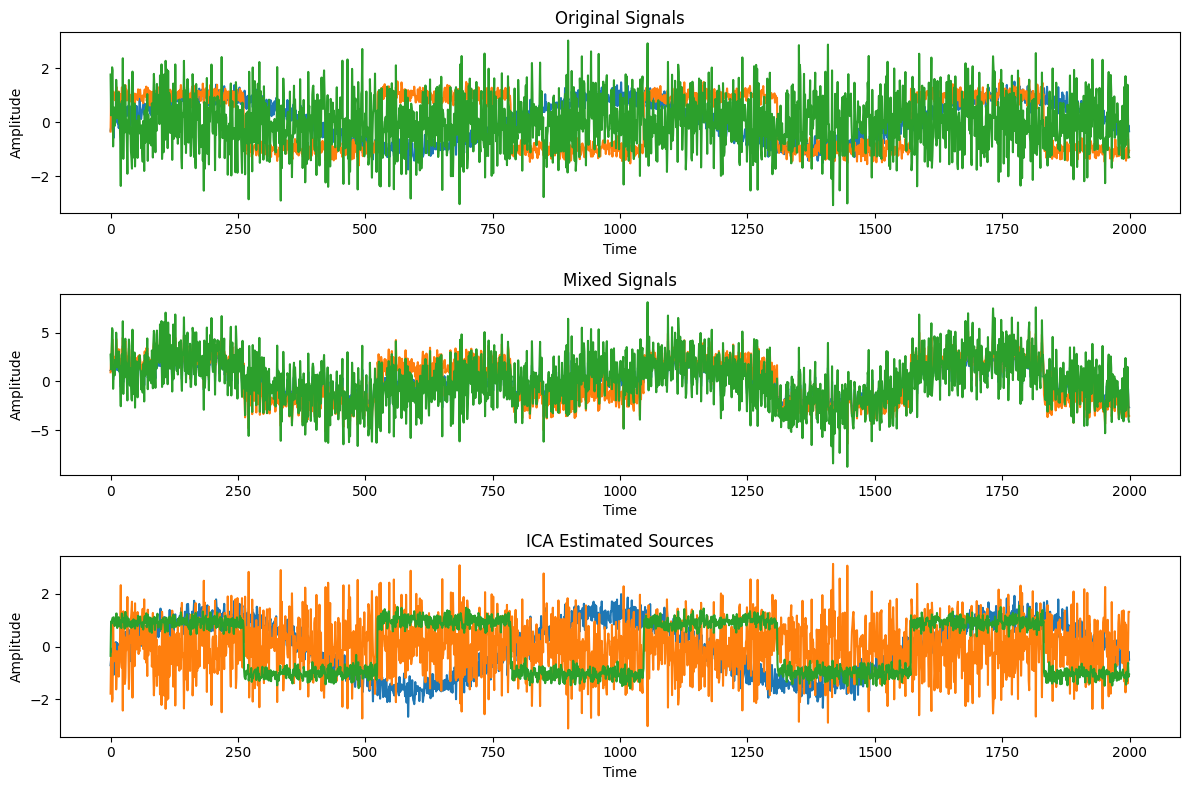

In [5]:
# Plot the results

# Plot the results
plt.figure(figsize=(12, 8))

# Plot original signals
plt.subplot(3, 1, 1)
plt.title("Original Signals")
plt.plot(S)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot mixed signals
plt.subplot(3, 1, 2)
plt.title("Mixed Signals")
plt.plot(X)
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Plot estimated sources
plt.subplot(3, 1, 3)
plt.title("ICA Estimated Sources")
plt.plot(S_)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()